In [1]:
# importing the necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# loading the dataset

dataset = pd.read_csv("/content/sample_data/winequality-red.csv")

In [4]:
dataset.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:

dataset.shape

(1599, 12)

In [6]:
# checking for null values

dataset.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

<Axes: ylabel='quality'>

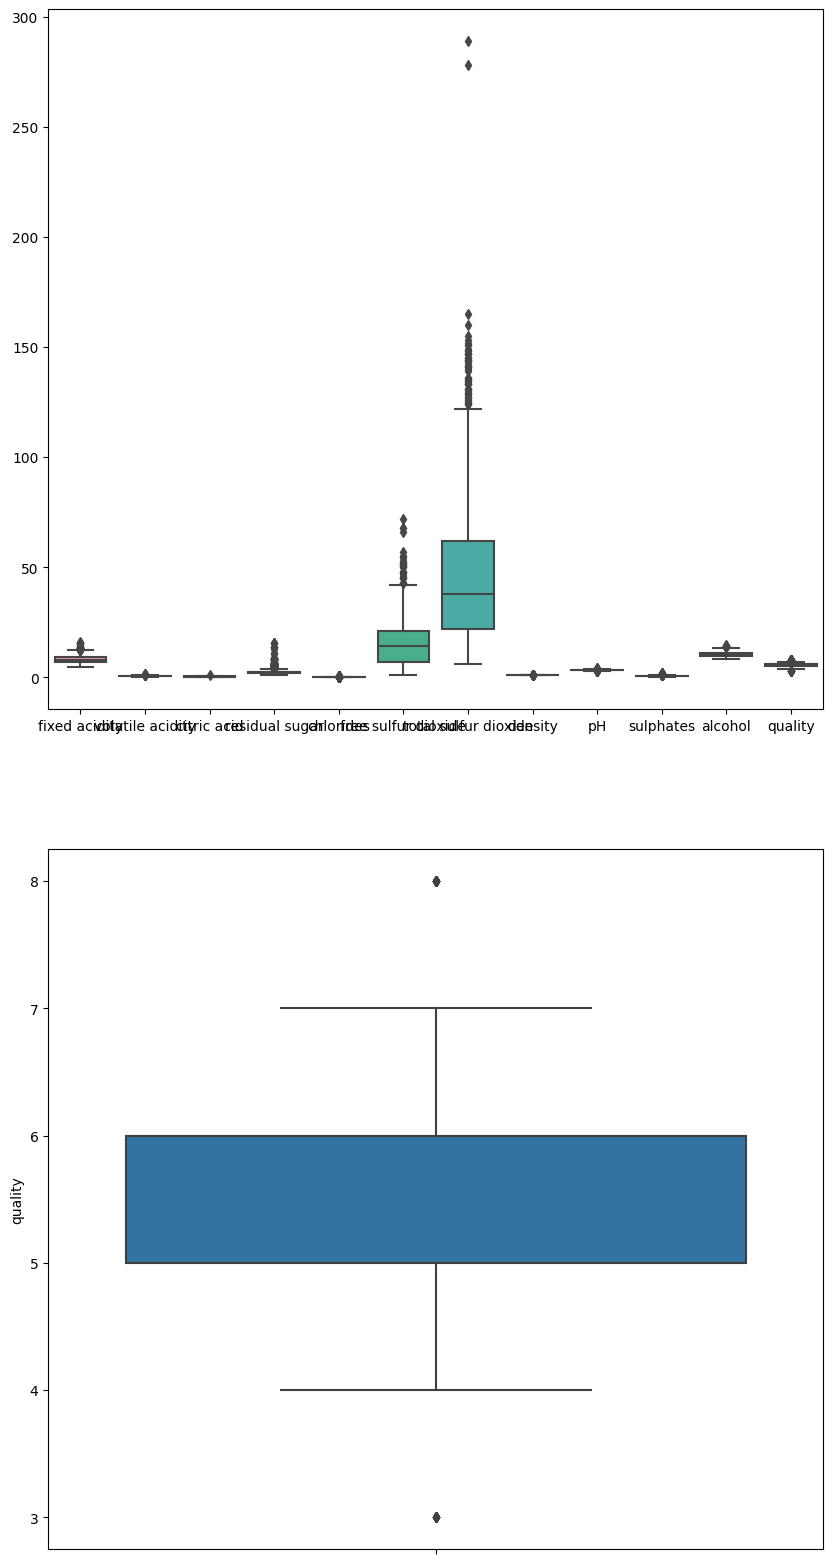

In [9]:
#Distribution of data

fig, axes = plt.subplots(nrows=2,ncols=1)
fig.set_size_inches(10,20)
sns.boxplot(data=dataset,orient="v",ax=axes[0])
sns.boxplot(data=dataset,y="quality",orient="pH",ax=axes[1])

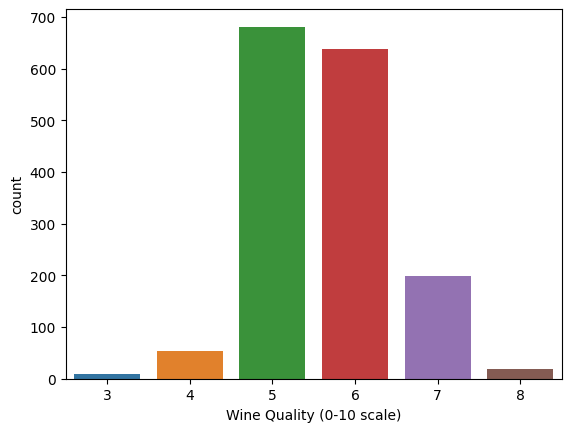

In [10]:
#distribution of class label

sns.countplot(x="quality", data=dataset)
plt.xlabel("Wine Quality (0-10 scale)")
plt.show()



<Axes: >

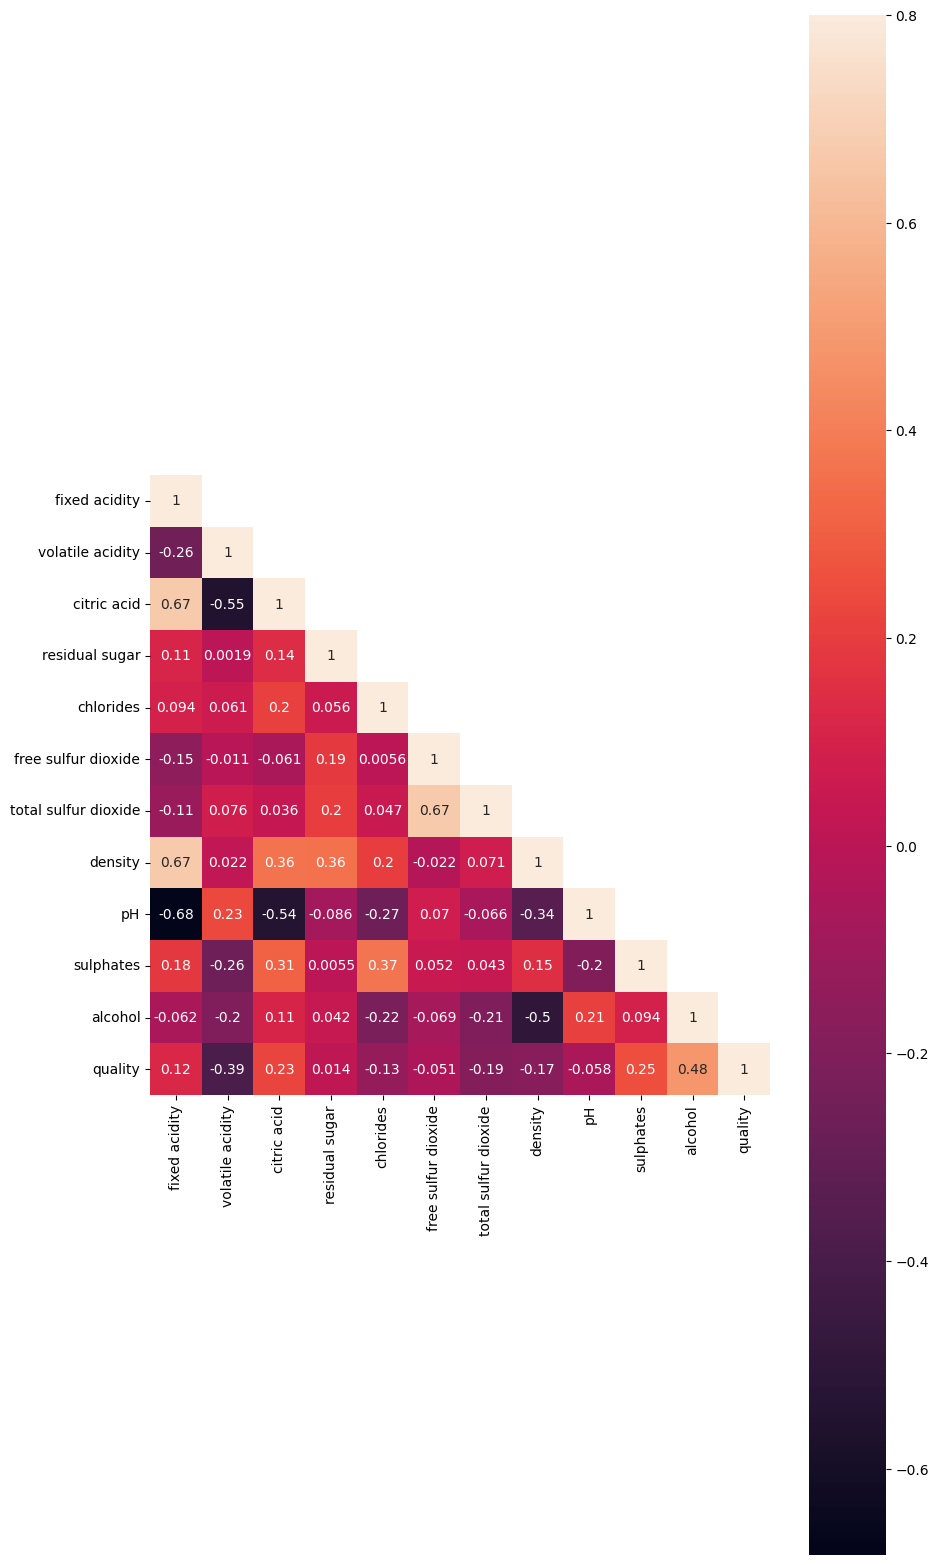

In [11]:


#Correlation analysis

corrMatt=dataset.corr()
mask=np.array(corrMatt)
mask[np.tril_indices_from(mask)]=False
fig,ax=plt.subplots()
fig.set_size_inches(10,20)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

In [12]:
#Splitting class label from other features
X=dataset.iloc[:, :-1].values
y=dataset.iloc[:, -1].values

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# adding extra column because of Multiple linear regression

X=np.append(arr=np.ones((X.shape[0],1)), values=X, axis=1)

# splitting the dataset

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# scaling the dataset

sc_X=StandardScaler()
X_train=sc_X.fit_transform(X_train)
X_test=sc_X.transform(X_test)


In [14]:
#linear regression

from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,y_train)

#Prediction
prediction=regressor.predict(X_test)

In [15]:
prediction1=pd.DataFrame(prediction)
prediction1.head()

,0
0,5.782930
1,5.036193
2,6.596989
3,5.339126
4,5.939529


In [16]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate Mean Absolute Error (MAE)

mae = mean_absolute_error(y_test, prediction)
print(f"Mean Absolute Error (MAE): {mae}")

# Calculate R-squared (R2)

r2 = r2_score(y_test, prediction)
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 0.4696330928661114
R-squared (R2): 0.3283887639580224


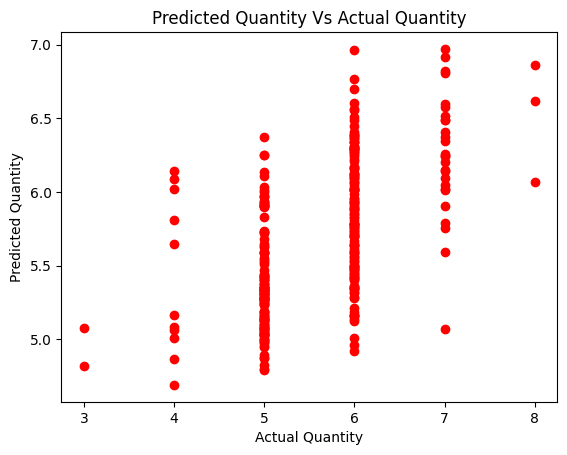

In [17]:
#displaying results

plt.scatter(y_test,prediction, c='r')
plt.xlabel('Actual Quantity')
plt.ylabel('Predicted Quantity')
plt.title('Predicted Quantity Vs Actual Quantity')
plt.show()